# Investigate a Dataset

The following data analysis is done on the titanic data about the passenger provided by kaggle which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This will consist of stating few questions and addressing them in the rest of the analysis process.

### Below is the dataset of the Titanic passenger information

In [1]:
import pandas
df = pandas.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### We try to answer the following question for the given data

* What factors made people more likely to survive?

### Data Cleaning

Before analysing the data we need to remove the data which is not needed for answering the given question. So the Name, Ticket, fare and Embarked in the data is not useful for answering the question since the survival of the passenger does not depend on it. So we remove the following columns from the given data.

In [2]:
df = df.drop(['Name', 'Ticket', 'Fare', 'Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22,1,0,NaN
1,2,1,1,female,38,1,0,C85
2,3,1,3,female,26,0,0,NaN
3,4,1,1,female,35,1,0,C123
4,5,0,3,male,35,0,0,NaN


### Analysing the data

We try to analyse the data to find different patterns to address our question i.e. finding factors that made people more likely to survive.

In [3]:
def getlen(sex, pclass):
    return len(df[(df['Sex']==sex)&(df['Pclass']==pclass)])
def getlensurvived(sex, pclass):
    return len(df[(df['Sex']==sex)&(df['Pclass']==pclass)&(df['Survived']==1)])

maleclass = []
femaleclass = []
totalclass = []
malesurvivedclass = []
femalesurvivedclass = []
totalsurvivedclass = []
#index 0 contains upperclass
#index 1 contains middleclass
#index 2 contains lowerclass

for i in range(1,4):
    maleclass.append(getlen("male", i));
    femaleclass.append(getlen("female", i));
    totalclass.append(maleclass[i-1] + femaleclass[i-1])
    malesurvivedclass.append(getlensurvived("male", i))
    femalesurvivedclass.append(getlensurvived("female", i))
    totalsurvivedclass.append(malesurvivedclass[i-1] + femalesurvivedclass[i-1])
        
totalmale = sum(maleclass)
totalfemale = sum(femaleclass)
totaltotal = sum(totalclass)

totalsurvivedmale = sum(malesurvivedclass)
totalsurvivedfemale = sum(femalesurvivedclass)
totalsurvivedtotal = sum(totalsurvivedclass)

def TableSeries(upperclass, middleclass, lowerclass, total):
    return pandas.Series([upperclass, middleclass, lowerclass, total], 
                               index=['Upper Class', 'Middle Class', 
                                      'Lower Class', 'Total'])

total = {'Male': TableSeries(maleclass[0], maleclass[1], maleclass[2], 
                             totalmale),
         'Female': TableSeries(femaleclass[0], femaleclass[1], femaleclass[2], 
                               totalfemale),
         'Total': TableSeries(totalclass[0], totalclass[1], totalclass[2], 
                              totaltotal)
        }
dftotal = pandas.DataFrame(total)
totalsurvived = {'Male': TableSeries(malesurvivedclass[0], malesurvivedclass[1], 
                                     malesurvivedclass[2], totalsurvivedmale),
                 'Female': TableSeries(femalesurvivedclass[0], femalesurvivedclass[1], 
                                       femalesurvivedclass[2], totalsurvivedfemale),
                 'Total': TableSeries(totalsurvivedclass[0], totalsurvivedclass[1], 
                                      totalsurvivedclass[2], totalsurvivedtotal)
        }
dftotalsurvived = pandas.DataFrame(totalsurvived)

#### Total People in Dataset

In [4]:
dftotal

,Female,Male,Total
Upper Class,94,122,216
Middle Class,76,108,184
Lower Class,144,347,491
Total,314,577,891


#### Total People that survived in Dataset

In [5]:
dftotalsurvived

,Female,Male,Total
Upper Class,91,45,136
Middle Class,70,17,87
Lower Class,72,47,119
Total,233,109,342


From the above tables it could be inferred that the probability of female to survive was more than the probability of male. Also female belonging to Upper class was highly probable to survive then the female belonging the middle class was likely to survive. Amongst females, those belonging to lower class were least likely to survive. Also the likelihood of surviving of the people belonging to upper class was more than the people belonging to other two classes.

There are people whose age is not available to us. So we can't really analyse them by considering age as a factor. So we calculate the mean and median of the age of the people whose age is known to us. We also calculate the mean and median of age of people who survived. We also find the same statistics of the people travelling in different class and people with different sex.

In [6]:
print('Number of people whose Age data is available - ' + 
      str(len(df[pandas.notnull(df['Age'])])))
print('Number of people whose Age data is missing - ' + 
      str(len(df[pandas.isnull(df['Age'])])))

def getAge(sex):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))]['Age']
def getSurvivedAge(sex):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))&
              (df['Survived']==1)]['Age']
def getClassAge(sex, pclass):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))&
              (df['Pclass']==pclass)]['Age']
def getSurvivedClassAge(sex, pclass):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))&(df['Pclass']==pclass)
              &(df['Survived']==1)]['Age']
def getTotalClassAge(pclass):
    return df[(pandas.notnull(df['Age']))&(df['Pclass']==pclass)]['Age']
def getTotalSurvivedClassAge(pclass):
    return df[(pandas.notnull(df['Age']))&(df['Pclass']==pclass)&
              (df['Survived']==1)]['Age']

meantotal = df[pandas.notnull(df['Age'])]['Age'].mean()
mediantotal = df[pandas.notnull(df['Age'])]['Age'].median()
meantotalsurvived = df[(pandas.notnull(df['Age']))&
                       (df['Survived']==1)]['Age'].mean()
mediantotalsurvived = df[(pandas.notnull(df['Age']))&
                         (df['Survived']==1)]['Age'].median()

malemeantotal = getAge('male').mean()
malemediantotal = getAge('male').median()
malemeantotalsurvived = getSurvivedAge('male').mean()
malemediantotalsurvived = getSurvivedAge('male').median()
                             
femalemeantotal = getAge('female').mean()
femalemediantotal = getAge('female').median()
femalemeantotalsurvived = getSurvivedAge('female').mean()
femalemediantotalsurvived = getSurvivedAge('female').median()

malemeanclass = []
malemedianclass = []
malemeansurvivedclass = []
malemediansurvivedclass = []
femalemeanclass = []
femalemedianclass = []
femalemeansurvivedclass = []
femalemediansurvivedclass = []
totalmean = []
totalmedian = []
totalmeansurvived = []
totalmediansurvived = []
#index 0 contains upperclass
#index 1 contains middleclass
#index 2 contains lowerclass

for i in range(1,4):
    malemeanclass.append(getClassAge('male', i).mean())
    malemedianclass.append(getClassAge('male', i).median())
    malemeansurvivedclass.append(getSurvivedClassAge('male', i).mean())
    malemediansurvivedclass.append(getSurvivedClassAge('male', i).median())
    femalemeanclass.append(getClassAge('female', i).mean())
    femalemedianclass.append(getClassAge('female', i).median())
    femalemeansurvivedclass.append(getSurvivedClassAge('female', i).mean())
    femalemediansurvivedclass.append(getSurvivedClassAge('female', i).median())
    totalmean.append(getTotalClassAge(i).mean())
    totalmedian.append(getTotalClassAge(i).median())
    totalmeansurvived.append(getTotalSurvivedClassAge(i).mean())
    totalmediansurvived.append(getTotalSurvivedClassAge(i).median())

totalmean = {'Male': TableSeries(malemeanclass[0], malemeanclass[1], 
                                 malemeanclass[2], malemeantotal),
             'Female': TableSeries(femalemeanclass[0], femalemeanclass[1], 
                                   femalemeanclass[2], femalemeantotal),
             'Total': TableSeries(totalmean[0], totalmean[1], 
                                  totalmean[2], meantotal)
        }
dftotalmean = pandas.DataFrame(totalmean)
totalmeansurvived = {'Male': TableSeries(malemeansurvivedclass[0], malemeansurvivedclass[1], 
                                         malemeansurvivedclass[2], malemeantotalsurvived),
                     'Female': TableSeries(femalemeansurvivedclass[0], femalemeansurvivedclass[1], 
                                           femalemeansurvivedclass[2], femalemeantotalsurvived),
                     'Total': TableSeries(totalmeansurvived[0], totalmeansurvived[1], 
                                          totalmeansurvived[2], meantotalsurvived)
        }
dftotalmeansurvived = pandas.DataFrame(totalmeansurvived)

totalmedian = {'Male': TableSeries(malemedianclass[0], malemedianclass[1], 
                                   malemedianclass[2], malemediantotal),
               'Female': TableSeries(femalemedianclass[0], femalemedianclass[1], 
                                     femalemedianclass[2], femalemediantotal),
               'Total': TableSeries(totalmedian[0], totalmedian[1], 
                                    totalmedian[2], mediantotal)
        }
dftotalmedian = pandas.DataFrame(totalmedian)
totalmediansurvived = {'Male': TableSeries(malemediansurvivedclass[0], malemediansurvivedclass[1], 
                                           malemediansurvivedclass[2], malemediantotalsurvived),
                       'Female': TableSeries(femalemediansurvivedclass[0], femalemediansurvivedclass[1], 
                                             femalemediansurvivedclass[2], femalemediantotalsurvived),
                       'Total': TableSeries(totalmediansurvived[0], totalmediansurvived[1], 
                                            totalmediansurvived[2], mediantotalsurvived),
        }
dftotalmediansurvived = pandas.DataFrame(totalmediansurvived)

Number of people whose Age data is available - 714
Number of people whose Age data is missing - 177


#### Mean Table for all people

In [7]:
dftotalmean

,Female,Male,Total
Upper Class,34.611765,41.281386,38.233441
Middle Class,28.722973,30.740707,29.877630
Lower Class,21.750000,26.507589,25.140620
Total,27.915709,30.726645,29.699118


#### Mean Table for people survived

In [8]:
dftotalmeansurvived

,Female,Male,Total
Upper Class,34.939024,36.248000,35.368197
Middle Class,28.080882,16.022000,25.901566
Lower Class,19.329787,22.274211,20.646118
Total,28.847716,27.276022,28.343690


#### Median Table for all people

In [9]:
dftotalmedian

,Female,Male,Total
Upper Class,35.0,40,37
Middle Class,28.0,30,29
Lower Class,21.5,25,24
Total,27.0,29,28


Median Table for people survived

In [10]:
dftotalmediansurvived

,Female,Male,Total
Upper Class,35,36,35
Middle Class,28,3,28
Lower Class,19,25,22
Total,28,28,28


Let us visualize the data according to age to get a better insight

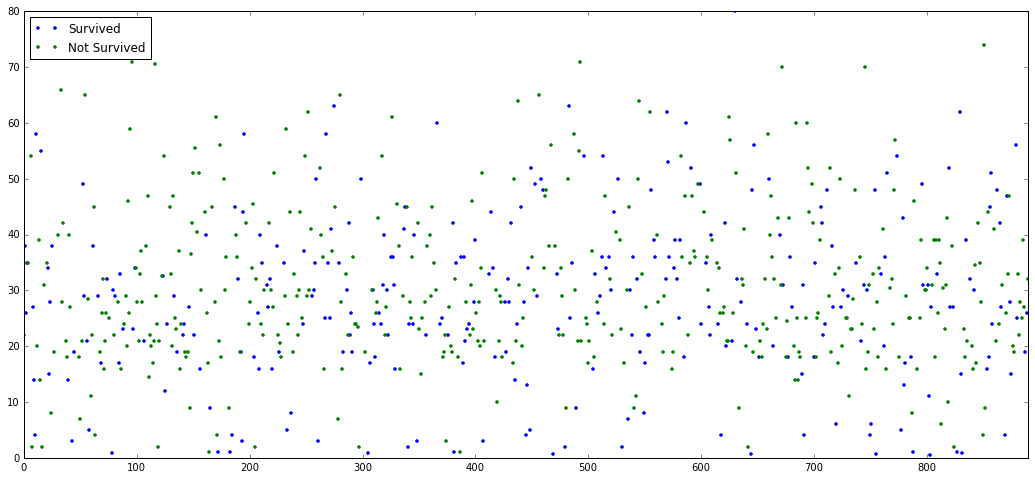

In [11]:
%matplotlib inline
def getAllPeopleAge(survived):
    return df[(pandas.notnull(df['Age']))&(df['Survived']==survived)]['Age']
df2 = pandas.concat([getAllPeopleAge(1), getAllPeopleAge(0)], 
                     axis=1, keys=['Survived','Not Survived'])
df2.plot(style=".", figsize=[18, 8]);

The above graph gives no pattern about the people who survived or didn't survived. So we try to explore further by creating a plot consisting of males who survived and females who survived

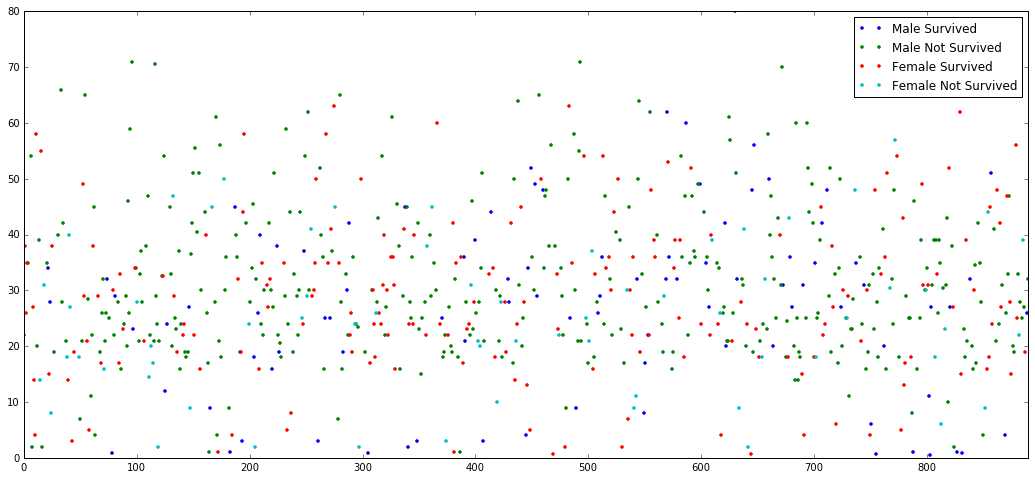

In [12]:
def getPeopleAge(sex, survived):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))&(df['Survived']==survived)]['Age']
%matplotlib inline
df3 = pandas.concat([getPeopleAge('male', 1), getPeopleAge('male', 0),
                     getPeopleAge('female', 1), getPeopleAge('female', 0)], 
                    axis=1, keys=['Male Survived','Male Not Survived', 
                                  'Female Survived','Female Not Survived'])
df3.plot(style=".", figsize=[18, 8]);

The plot gives a little idea that most of the Female survived. But still there are many female who didn't survive. The males above age of 65 didn't survive while all females above age of 65 survived. Let us explore further by dividing them into different class of people find a better pattern. First we plot just the male and then the females.

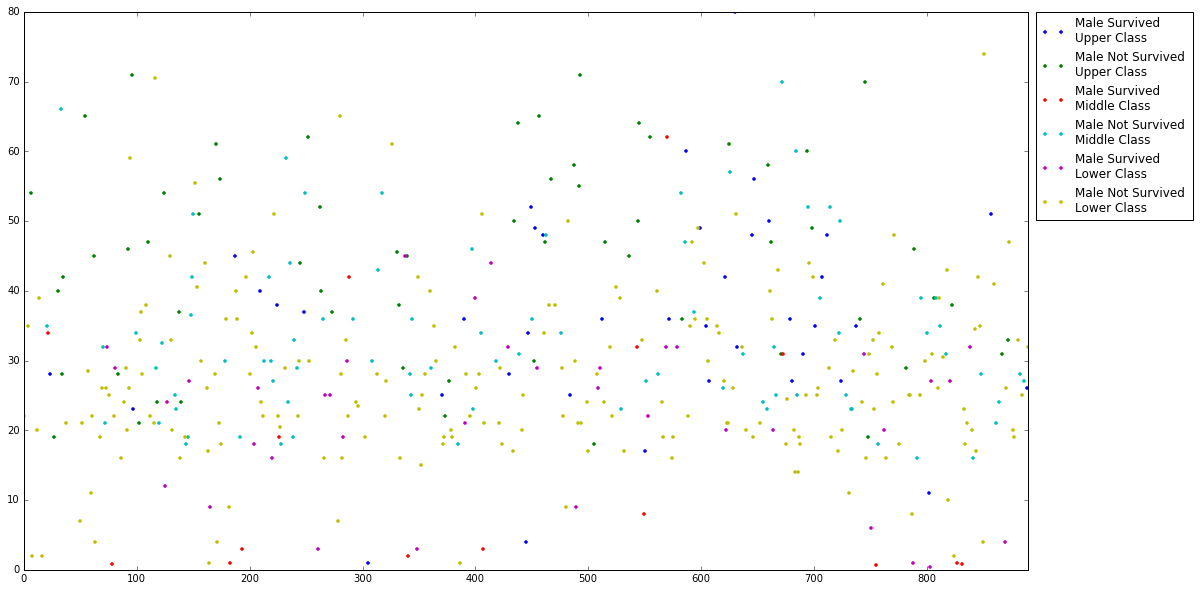

In [13]:
def getPeopleClassAge(sex, survive, pclass):
    return df[(df['Sex']==sex)&(pandas.notnull(df['Age']))&
              (df['Survived']==survive)&(df['Pclass']==pclass)]['Age']
df4list = []
for i in range(1,4):
    df4list.append(getPeopleClassAge('male', 1, i))
    df4list.append(getPeopleClassAge('male', 0, i))

df4 = pandas.concat(df4list, axis=1, keys=['Male Survived \nUpper Class', 
                                           'Male Not Survived \nUpper Class', 
                                           'Male Survived \nMiddle Class', 
                                           'Male Not Survived \nMiddle Class',
                                           'Male Survived \nLower Class', 
                                           'Male Not Survived \nLower Class'])
ax = df4.plot(style=".", figsize=[18, 10]);
lx = ax.legend(bbox_to_anchor=(1.17, 1.01))

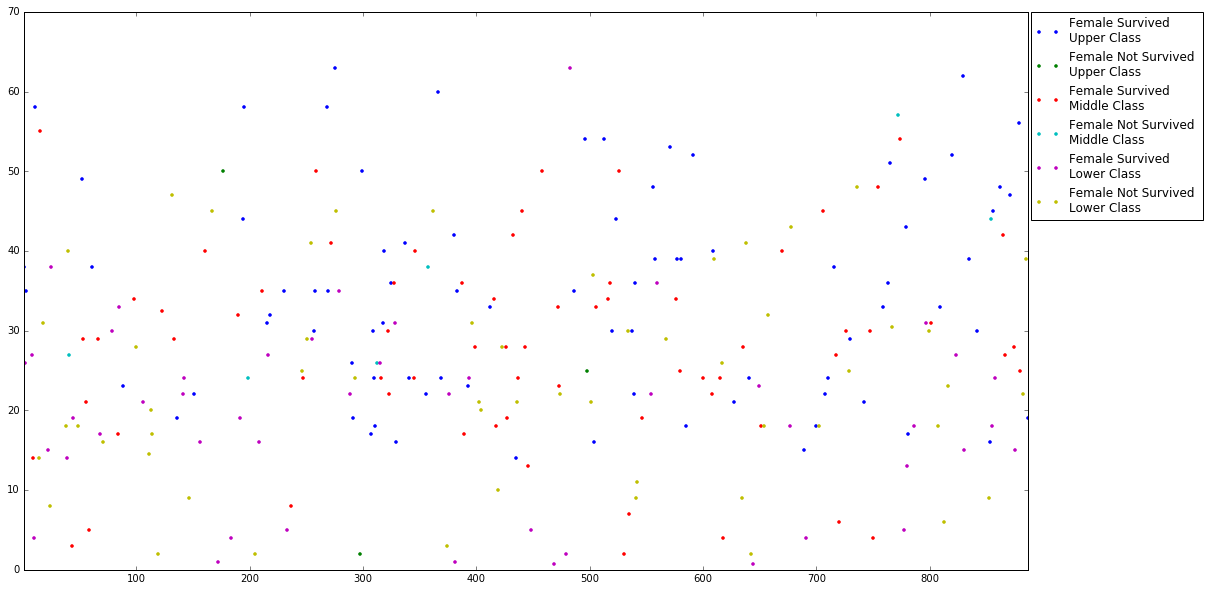

In [14]:
df5list = []
for i in range(1,4):
    df5list.append(getPeopleClassAge('female', 1, i))
    df5list.append(getPeopleClassAge('female', 0, i))
df5 = pandas.concat(df5list, axis=1, keys=['Female Survived \nUpper Class', 
                                           'Female Not Survived \nUpper Class', 
                                           'Female Survived \nMiddle Class', 
                                           'Female Not Survived \nMiddle Class',
                                           'Female Survived \nLower Class', 
                                           'Female Not Survived \nLower Class'])
ax = df5.plot(style=".", figsize=[18, 10]);
lx = ax.legend(bbox_to_anchor=(1.18, 1.01))

Finally before inferring any analysed data from above plots let us take a look at the age distribution of the people in data.

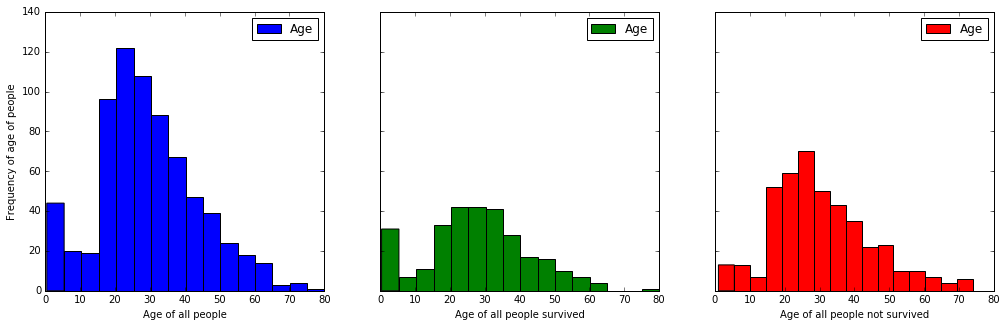

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
def subAgePlot(seriest, col, bins, size, tcolor, xaxis, yaxis):
    dft = pandas.DataFrame(seriest)
    ax = dft.plot(kind='hist', ax=axes[col], bins=bins, figsize=size, color=tcolor)
    x = ax.set_xlabel(xaxis)
    y = ax.set_ylabel(yaxis)
    
subAgePlot(df[(pandas.notnull(df['Age']))]['Age'], 0, 16, [17, 5], "BLUE", 
           'Age of all people', 'Frequency of age of people')
subAgePlot(getAllPeopleAge(1), 1, 16, [17, 5], "GREEN", 
           'Age of all people survived', 'Frequency of age of people')
subAgePlot(getAllPeopleAge(0), 2, 16, [17, 5], "RED", 
           'Age of all people not survived', 'Frequency of age of people')

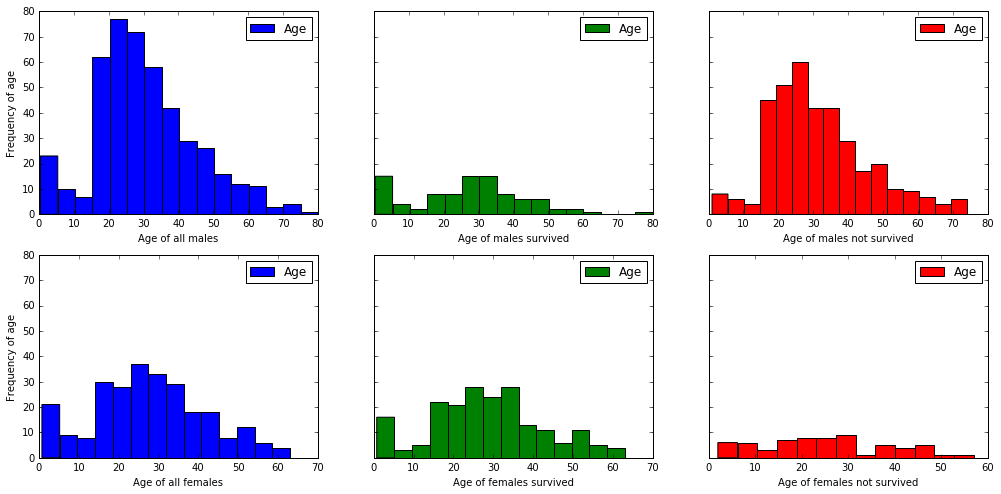

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True)

subAgePlot(getAge('male'), (0,0), 16, [17, 8], "BLUE", 
           'Age of all males', 'Frequency of age')
subAgePlot(getPeopleAge('male', 1), (0,1), 16, [17, 8], "GREEN", 
           'Age of males survived', 'Frequency of age')
subAgePlot(getPeopleAge('male', 0), (0,2), 16, [17, 8], "RED", 
           'Age of males not survived', 'Frequency of age')

subAgePlot(getAge('female'), (1,0), 14, [17, 8], "BLUE", 
           'Age of all females', 'Frequency of age')
subAgePlot(getPeopleAge('female', 1), (1,1), 14, [17, 8], "GREEN", 
           'Age of females survived', 'Frequency of age')
subAgePlot(getPeopleAge('female', 0), (1,2), 13, [17, 8], "RED", 
           'Age of females not survived', 'Frequency of age')

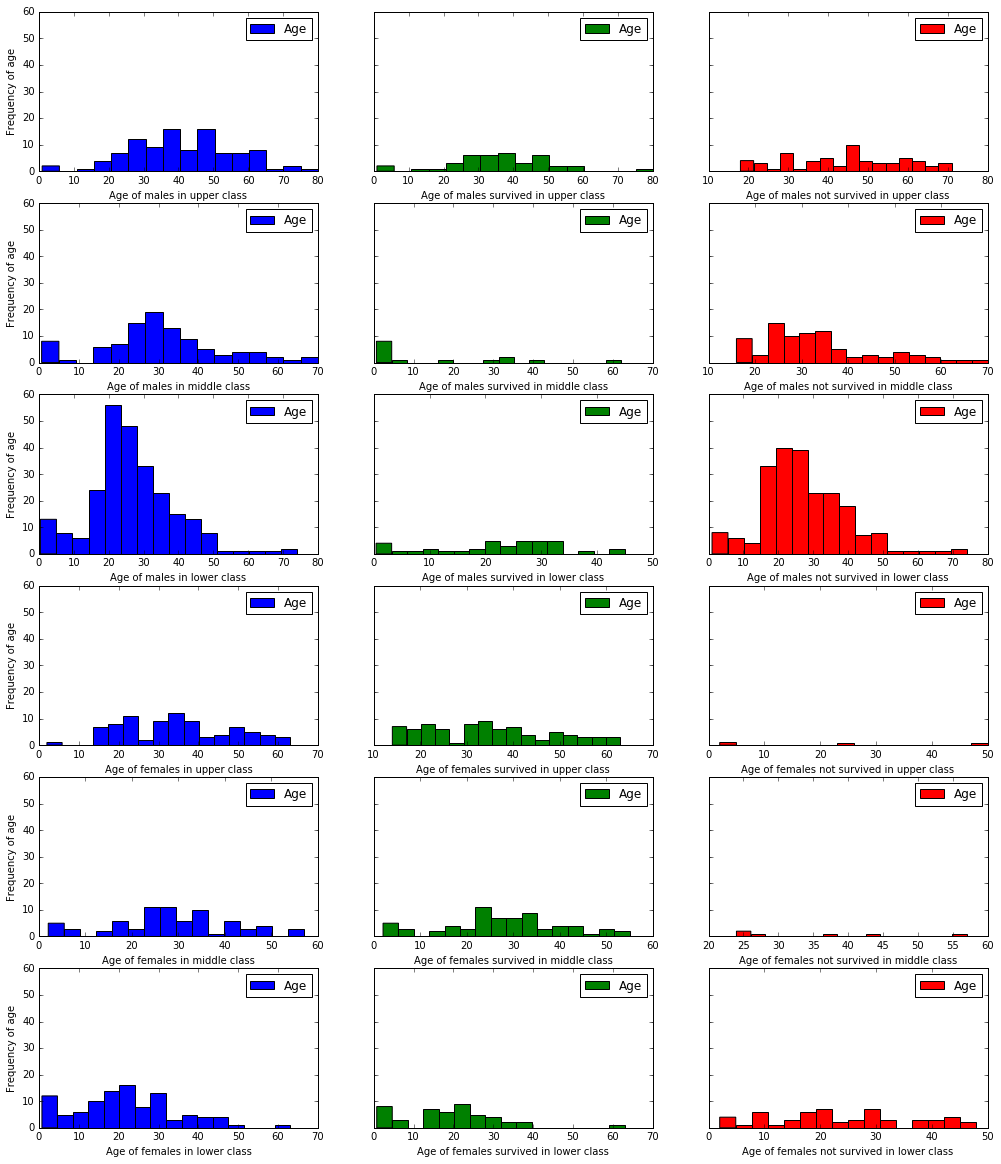

In [17]:
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)
subAgePlot(getClassAge('male', 1), (0,0), 16, [17, 20], "BLUE", 
           'Age of males in upper class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 1, 1), (0,1), 16, [17, 20], "GREEN", 
           'Age of males survived in upper class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 0, 1), (0,2), 16, [17, 20], "RED", 
           'Age of males not survived in upper class', 'Frequency of age')

subAgePlot(getClassAge('male', 2), (1,0), 16, [17, 20], "BLUE", 
           'Age of males in middle class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 1, 2), (1,1), 16, [17, 20], "GREEN", 
           'Age of males survived in middle class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 0, 2), (1,2), 16, [17, 20], "RED", 
           'Age of males not survived in middle class', 'Frequency of age')

subAgePlot(getClassAge('male', 3), (2,0), 16, [17, 20], "BLUE", 
           'Age of males in lower class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 1, 3), (2,1), 16, [17, 20], "GREEN", 
           'Age of males survived in lower class', 'Frequency of age')
subAgePlot(getPeopleClassAge('male', 0, 3), (2,2), 16, [17, 20], "RED", 
           'Age of males not survived in lower class', 'Frequency of age')


subAgePlot(getClassAge('female', 1), (3,0), 16, [17, 20], "BLUE", 
           'Age of females in upper class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 1, 1), (3,1), 16, [17, 20], "GREEN", 
           'Age of females survived in upper class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 0, 1), (3,2), 16, [17, 20], "RED", 
           'Age of females not survived in upper class', 'Frequency of age')

subAgePlot(getClassAge('female', 2), (4,0), 16, [17, 20], "BLUE", 
           'Age of females in middle class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 1, 2), (4,1), 16, [17, 20], "GREEN", 
           'Age of females survived in middle class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 0, 2), (4,2), 16, [17, 20], "RED", 
           'Age of females not survived in middle class', 'Frequency of age')

subAgePlot(getClassAge('female', 3), (5,0), 16, [17, 20], "BLUE", 
           'Age of females in lower class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 1, 3), (5,1), 16, [17, 20], "GREEN", 
           'Age of females survived in lower class', 'Frequency of age')
subAgePlot(getPeopleClassAge('female', 0, 3), (5,2), 16, [17, 20], "RED", 
           'Age of females not survived in lower class', 'Frequency of age')

### Conclusion

On analysing the above plots it could be said that the females belonging to upper Class and middle Class are very likely to survive while the females in the lower class with age below 40 were more likely to survive than any other females in the lower class.

There is no particular pattern of the survival of males in the data expect the male passengers with the age of less than 15 and belonging to upper class and middle class were more likely to survive.